#Notebook 3B: On CounterFactual Explanations for Machine Learning
Organized and Conceptualized by Christopher Monterola

This notebook is guided by the following references:

1. Verma et. al, NeurIPS 2020 Workshop: ML Retrospectives, Surveys & Meta-Analyses (ML-RSA).
2. Christoph Molnar, Interpretable Machine Learning:A Guide for Making Black Box Models Explainable, 2019. https://christophm.github.io/interpretable-ml-book/.
3.  https://towardsdatascience.com/counterfactual-explanations-in-model-interpretations-a73caec5b74b
4. chatGPT prompts

Counterfactuals are important concepts in philosophy, statistics, and data science. They help us think about 'what could have happened' if things were different. In the world of data science and machine learning, counterfactual explanations help us understand how we can change the inputs of a model to get a different prediction.

In simpler terms, a counterfactual explanation is like asking, 'What would need to change to get a different result?' This is especially useful for explaining how decision-making models work, like why a loan application was rejected and what changes could make it approved.

Counterfactual explanations aim to find the smallest changes needed to make a model's prediction different. For example, suppose a loan application was denied because of the applicant's income, age, and loan amount. In that case, a counterfactual explanation might tell us how much the income needs to increase to get the loan approved while keeping everything else the same.



#1. Formulation

Counterfactuals represent a methodical approach to finding the smallest adjustments in specific variables within your feature-target space that enable you to achieve the desired outcome. Here's a simplified overview of the fundamental process best done via illustration.



### Illustration
This code demonstrates the core steps of finding a counterfactual explanation, although in practice, you may have more complex models and constraints.


### Step 1: Set Up the Problem
- We have a predictive model: $y = f(X)$ where $X$ represents input features.

### Step 2: Define the Objective Function
- Objective function: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (f(X_i) - y_{\text{target}})^2$
- Measures the difference between the actual prediction and the target prediction $(y_{\text{target}}$).

### Step 3: Specify Constraints
- Constraints ensure meaningful and feasible solutions.
- Example constraints: $x_1 \geq 1$, $x_2 \geq 2$.

### Step 4: Solve the Optimization Problem
- Use optimization algorithms (e.g., gradient descent) to minimize the objective function while satisfying constraints.

### Step 5: Find the Counterfactual
- Optimization result provides counterfactual explanation - changes needed in input features to achieve $y_{\text{target}}$.

### Step 6: Interpret the Counterfactual
- Interpret changes in input features and new prediction.



In [ ]:
import numpy as np
from scipy.optimize import minimize

# Step 1: Set Up the Problem
def model(x):
    return 0.5 * x[0] + 0.3 * x[1]

# Define the target prediction we want to achieve
y_target = 1.5  # We want to change the prediction to 0.7

# Step 2: Define the Objective Function
def objective_function(x):
    prediction = model(x)
    return (prediction - y_target) ** 2

# Step 3: Specify Constraints
constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - 1},  # x1 >= 1 (Example constraint)
               {'type': 'ineq', 'fun': lambda x: x[1] - 2})  # x2 >= 2 (Example constraint)

# Step 4: Solve the Optimization Problem
initial_guess = [1, 1]  # Initial guess for input features
result = minimize(objective_function, initial_guess, constraints=constraints)

if result.success:
    # Step 5: Find the Counterfactual
    counterfactual = result.x

    # Step 6: Interpret the Counterfactual
    prediction = model(counterfactual)
    error = abs(prediction - y_target)

    if error <= 0.2:  # 20% error threshold
      print("Counterfactual Explanation - Changes needed in input features:")
      print("Change in x1:", counterfactual[0] - initial_guess[0])
      print("new x1:", counterfactual[0])
      print("Change in x2:", counterfactual[1] - initial_guess[1])
      print("new X2:", counterfactual[1])
      print("Prediction:", model(counterfactual))
    else:
        print("Counterfactual was unsuccessful. Error exceeded 20%.")
else:
    print("Failed to find a valid counterfactual.")

# Output:
# Counterfactual Explanation - Changes needed in input features:
# Change in x1: 1.0000000135771535
# Change in x2: 2.000000000239243
# New Prediction: 0.7000000000001763


Counterfactual Explanation - Changes needed in input features:
Change in x1: 0.7538461474431755
new x1: 1.7538461474431755
Change in x2: 1.0769230734276287
new X2: 2.0769230734276287
Prediction: 1.4999999957498762


This code demonstrates the core steps of finding a counterfactual explanation, although in practice, you may have more complex models and constraints. For example the model can be nonlinear and takes the form of an ensemble decision tree map as in the case of Random Forest or Gradient Boosting methods. Likewise, constraints can be in the form of differential equations. Note also that it is possible that Counterfactuals don`t exist, consider for example a target variable of negative (say -1) in the previous example. For more complex cases, the solution space can be non-convex and optimization techniques needs to be modified.

# 2. Diverse Counterfactual Explanations (DICE)

DICE is currently the standard algorithm for generating counterfactuals due to the stability and versatility of its results.

Similar to the explanation in the formulation, DICE generates a set of counterfactual examples by systematically perturbing the input data. Some features are held constant, while others are varied within certain constraints.
The goal is to create alternative scenarios that could have led to different model predictions while maintaining realism and feasibility.

For each generated counterfactual, DICE evaluates the machine learning model's prediction. It applies the model to the perturbed input data points to determine the predicted outcomes.

DICE places a strong emphasis on providing a diverse set of counterfactual explanations. This ensures that the generated counterfactuals explore various aspects of the model's decision-making process.


DICE is valuable for various applications in machine learning and AI, such as:

* Understanding individual model predictions.
* Assisting users in making informed decisions based on model output.
* Identifying model biases and potential data issues.
* Supporting model debugging and improvement efforts.
* Enhancing trust and transparency in AI systems.


In [ ]:
!pip install dice-ml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.


#Example 1. Passing score of a student

Imagine we have a machine learning model that predicts whether a student will pass an exam based on two features: hours of study and previous test scores. The model predicts '1' for pass and '0' for fail.

In this example, the model predicts what needs to be done for a student with 2 hours of study and a previous score of 20 to pass the exam.

In [ ]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Teaching/ML2_MSDS2025PTB/Notebook3_Interpretability/'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(data_dir + 'MSDS_students.csv')
df.head(8)

,HoursStudy,PreviousExam,Results
0,1,10,0
1,2,20,0
2,3,30,0
3,4,40,0
4,5,50,0
5,6,60,1
6,7,70,1
7,8,80,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Results', axis=1)
y = df['Results']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', GradientBoostingClassifier())
])

In [ ]:
pipe.fit(X_train, y_train);

Now, let's use counterfactual explanations to determine what changes are needed for this student to pass the exam:

In [ ]:
from dice_ml import Model, Dice, Data

In [ ]:
model = Model(model=pipe, backend='sklearn')
dice_data = Data(
    dataframe=X_train.join(y_train),
    continuous_features=X.columns.tolist(),
    outcome_name='Results')
dice_exp = Dice(dice_data, model, method='genetic')

In [ ]:
cfes1 = dice_exp.generate_counterfactuals(
    X_test.iloc[[1]],
    total_CFs=5,
    desired_class="opposite"
)
cfes1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  4.81it/s]

Query instance (original outcome : 0)


,HoursStudy,PreviousExam,Results
0,2,20,0



Diverse Counterfactual set (new outcome: 1)


,HoursStudy,PreviousExam,Results
0,-,64,1
0,-,66,1
0,-,89,1
0,-,94,1
0,1,58,1


In [ ]:
cfes2 = dice_exp.generate_counterfactuals(
    X_test.iloc[[1]],
    total_CFs=5,
    desired_class="opposite",
    features_to_vary=["HoursStudy"]
)
cfes2.visualize_as_dataframe(show_only_changes=True)

# Example 2. Counter Factuals in Loan Approval
Taken from https://christophm.github.io/interpretable-ml-book/counterfactual.html which is based on on the credit dataset example in Dandl et al. (2020). The German Credit Risk dataset can be found on the machine learning challenges platform kaggle.com.

 You can imagine the problem this Way: Daniel Padilla applies for a loan and gets rejected by the (machine learning powered) banking software. He wonders why his application was rejected and how he might improve his chances to get a loan. The question of “why” can be formulated as a counterfactual: What is the smallest change to the features (income, number of credit card amount, Job, …) that would change the prediction from rejected to approved?

Context

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as **good or bad credit risks** according to the set of attributes. The link to the original dataset can be found below.

Note from the author(S. Dands): "It is almost impossible to understand the original dataset due to its complicated system of categories and symbols. Thus, I wrote a small Python script to convert it into a readable CSV file. Several columns are simply ignored, because in my opinion either they are not important or their descriptions are obscure."

The selected attributes are:

* Age (numeric)
*  Sex (text: male, female)
*  Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich).
* Checking account (numeric, in DM - Deutsch Mark).
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
* Risky? (text: 0 - "No", 1 -"Yes")



In [ ]:
df = pd.read_csv(data_dir + 'german_credit_data_new.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head(5)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Remove rows with missing values (NaN)
df.dropna(inplace=True)

# Encode categorical variables using label encoding
label_encoder = LabelEncoder()
categorical_columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']

for column in categorical_columns:
   df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
1,22,0,2,1,0,1,5951,48,5,0
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0
7,35,1,3,2,0,1,6948,36,1,1
9,28,1,3,1,0,1,5234,30,1,0
...,...,...,...,...,...,...,...,...,...,...
989,48,1,1,1,0,1,1743,24,5,1
993,30,1,3,1,0,0,3959,36,4,1
996,40,1,3,1,0,0,3857,30,1,1
998,23,1,2,0,0,0,1845,45,5,0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Risk', axis=1)
y = df['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Counterfactuals are human-friendly explanations, because they are contrastive to the current instance and because they are selective, meaning they usually focus on a small number of feature changes. But counterfactuals suffer from the ‘Rashomon effect’. **Rashomon** is a Japanese movie in which the murder of a Samurai is told by different people. Each of the stories explains the outcome equally well, but the stories contradict each other. The same can also happen with counterfactuals, since there are usually multiple different counterfactual explanations. Each counterfactual tells a different “story” of how a certain outcome was reached. One counterfactual might say to change feature A, the other counterfactual might say to leave A the same but change feature B, which is a contradiction. This issue of multiple truths can be addressed either by reporting all counterfactual explanations or by having a criterion to evaluate counterfactuals and select the best one.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', GradientBoostingClassifier())
])

pipe.fit(X_train, y_train);

In [ ]:
from dice_ml import Model, Dice, Data

model = Model(model=pipe, backend='sklearn')
dice_data = Data(
    dataframe=X_train.join(y_train),
    continuous_features=X.columns.tolist(),
    outcome_name='Risk')
dice_exp = Dice(dice_data, model, method='genetic')

In [ ]:
cfes1 = dice_exp.generate_counterfactuals(
    X_test.iloc[[0]],
    total_CFs=10,
    desired_class="opposite"
)
cfes1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  8.11it/s]

Query instance (original outcome : 1)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,0,0,1345,18,5,1



Diverse Counterfactual set (new outcome: 0)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,-,-,-,-,-,-,759,-,1,0
0,32,-,-,-,-,-,1938,24,-,0
0,48,-,-,-,-,-,1024,24,-,0
0,33,-,-,-,-,1,-,-,-,0
0,-,-,-,-,-,-,759,12,1,0
0,31,-,-,-,-,-,2746,36,4,0
0,60,-,-,-,-,-,2246,12,4,0
0,20,-,-,-,1,-,674,12,-,0
0,21,-,1,-,-,-,976,27,-,0
0,40,-,1,-,-,-,701,12,-,0


As shown above the goal is to find counterfactual explanations for a customer X_test.iloc[0] (Age =26, Male, Job =2, etc) that is currently tag as a "Risky" client.

In [ ]:
cfes2 = dice_exp.generate_counterfactuals(
    X_test.iloc[[0]],
    total_CFs=5,
    desired_class="opposite",
    features_to_vary=["Credit amount",
                      "Duration", "Purpose","Job"]
)
cfes2.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00, 11.53it/s]

Query instance (original outcome : 1)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,26,1,2,1,0,0,1345,18,5,1



Diverse Counterfactual set (new outcome: 0)


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,-,-,-,-,-,-,-,-,-,0
0,-,-,-,-,-,-,802,-,-,0
0,-,-,-,-,-,-,802,15,-,0
0,-,-,-,-,-,-,1024,24,-,0
0,-,-,-,-,-,-,-,24,-,0


## Local Feature Importance:

**Focus:** Local feature importance is concerned with understanding the importance of individual features for a specific prediction made by a machine learning model. In SHAP this is like visualizing a single decision plot for a specific instance - meaning it provides insights into why a particular prediction was made for a particular data point.

**Explanation:** Local feature importance aims to explain why a model made a specific decision for a single data instance. It highlights the influence of each feature on that specific prediction.

**Use Cases:** Local feature importance is valuable for understanding model behavior at the individual prediction level. It can be used to explain why a particular loan application was approved or denied, why a medical diagnosis was made, or why an image was classified as a certain object.

In [ ]:
local_feat_importance = dice_exp.local_feature_importance(X_test.iloc[[0]], total_CFs=50)

100%|██████████| 1/1 [00:06<00:00,  6.51s/it]


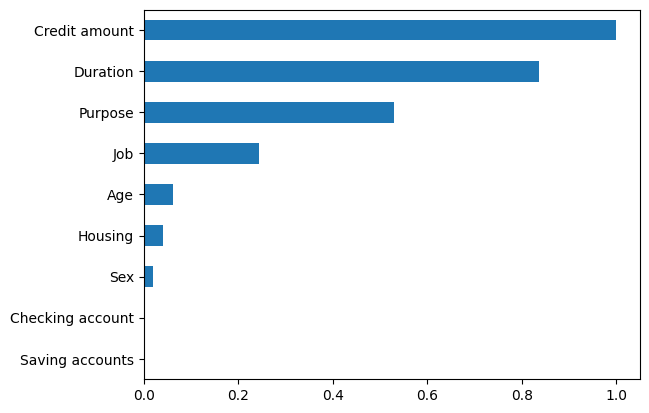

In [ ]:
pd.Series(local_feat_importance.local_importance[0]).sort_values().plot(kind='barh');

## Global Feature Importance:

**Focus:** Global feature importance, on the other hand, focuses on understanding the overall importance of features across the entire dataset used to train the machine learning model, hence, it provides an aggregated view of feature importance, considering all data points collectively. Imagine the decision plot for the entire training set.

**Explanation:** Global feature importance helps identify which features are generally more influential in the model's decision-making process across all data instances. It doesn't provide insights into specific predictions.

**Use Cases:** Global feature importance is useful for feature selection, model debugging, and understanding which features are generally informative for the model's overall performance. It can guide decisions about which features to prioritize for data collection, preprocessing, or feature engineering.



In [ ]:
global_feat_importance = dice_exp.global_feature_importance(X_train[y_train==1].iloc[:50])

100%|██████████| 50/50 [00:06<00:00,  7.96it/s]


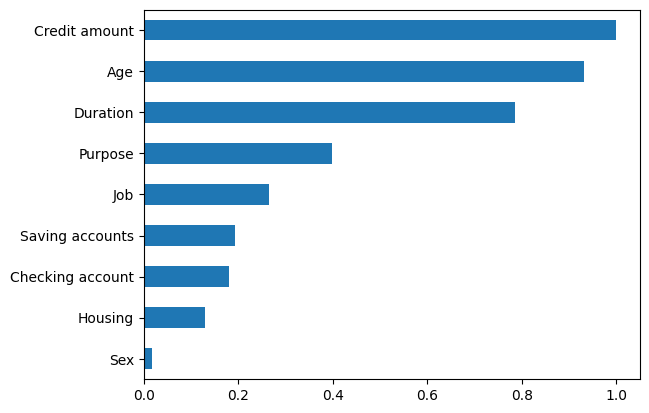

In [ ]:
pd.Series(global_feat_importance.summary_importance).sort_values().plot(kind='barh');

#Example 3. CounterFactuals in Credit Scoring

Adapted from reference 2: Christoph Molnar, Interpretable Machine Learning:A Guide for Making Black Box Models Explainable, 2019. https://christophm.github.io/interpretable-ml-book/, revised code forked from https://github.com/aim-msds/msds2023-ml2-interpretability/blob/e9267e92c3d159977b32b45fe39e3627c8083fa7/notebooks/Notebook%203c%20-%20Post-hoc%20Explainability%20Methods.ipynb

## Target

- **SeriousDlqin2yrs**: Person experienced 90 days past due delinquency or worse (Y/N)

## Features

- **RevolvingUtilizationOfUnsecuredLines**: Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits
- **Age**: Age of borrower in years
- **NumberOfTime30-59DaysPastDueNotWorse**: Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
- **DebtRatio**: Monthly debt payments, alimony, living costs divided by monthly gross income
- **MonthlyIncome**: Monthly income
- **NumberOfOpenCreditLinesAndLoans**: Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g., credit cards)
- **NumberOfTimes90DaysLate**: Number of times borrower has been 90 days or more past due.
- **NumberRealEstateLoansOrLines**: Number of mortgage and real estate loans including home equity lines of credit
- **NumberOfTime60-89DaysPastDueNotWorse**: Number of times borrower has been 60-89 days past due but no worse in the last 2 years.
- **NumberOfDependents**: Number of dependents in family excluding themselves (spouse, children etc.)

Data is covered here: https://medium.com/@finntanweelip/feature-selection-in-credit-scoring-b0eee604cd51

In [ ]:
import pandas as pd
from matplotlib import rcParams

rcParams.update({'figure.figsize': (8, 6), 'axes.spines.top': False,
                 'axes.spines.right': False, 'axes.labelsize': 14,
                 'axes.titlesize': 16, 'axes.titleweight': 'bold',
                 'lines.linewidth': 3})

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
X, y = fetch_openml(data_id=43978, parser='auto', return_X_y=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=1337)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
pipe = Pipeline([
    ('scaler', RobustScaler()),
    ('clf', GradientBoostingClassifier())
])

In [ ]:
pipe.fit(X_train, y_train);

In [ ]:
#!pip install dice-ml

In [ ]:
from dice_ml import Model, Dice, Data

In [ ]:
model = Model(model=pipe, backend='sklearn')
dice_data = Data(
    dataframe=X_train.join(y_train),
    continuous_features=X.columns.tolist(),
    outcome_name='SeriousDlqin2yrs')
dice_exp = Dice(dice_data, model, method='genetic')

In [ ]:
cfes1 = dice_exp.generate_counterfactuals(
    X_test.iloc[[0]],
    total_CFs=2,
    desired_class="opposite"
)
cfes1.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  6.13it/s]

Query instance (original outcome : 1.0)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.230358,62.0,1.0,1.91678,2210.0,16.0,1.0,2.0,0.0,0.0,1.0



Diverse Counterfactual set (new outcome: 0.0)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.124683,53.0,0.0,2.1,-,12.0,0.0,-,-,-,0.0
0,0.0,41.0,0.0,0.0,-,13.0,0.0,-,-,-,0.0


In [ ]:
cfes2 = dice_exp.generate_counterfactuals(
    X_test.iloc[[0]],
    total_CFs=3,
    desired_class="opposite",
    features_to_vary=["RevolvingUtilizationOfUnsecuredLines",
                      "DebtRatio", "NumberOfTimes90DaysLate",
                      "NumberOfTime30-59DaysPastDueNotWorse"]
)
cfes2.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:00<00:00,  5.77it/s]

Query instance (original outcome : 1.0)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.230358,62.0,1.0,1.91678,2210.0,16.0,1.0,2.0,0.0,0.0,1.0



Diverse Counterfactual set (new outcome: 0.0)


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,0.0474186,-,-,1.2,-,-,0.0,-,-,-,0.0
0,0.1997558,-,-,0.5,-,-,0.0,-,-,-,0.0
0,0.0231761,-,-,0.3,-,-,0.0,-,-,-,0.0


In [ ]:
local_feat_importance = dice_exp.local_feature_importance(X_test.iloc[[0]], total_CFs=50)

100%|██████████| 1/1 [00:00<00:00,  2.14it/s]


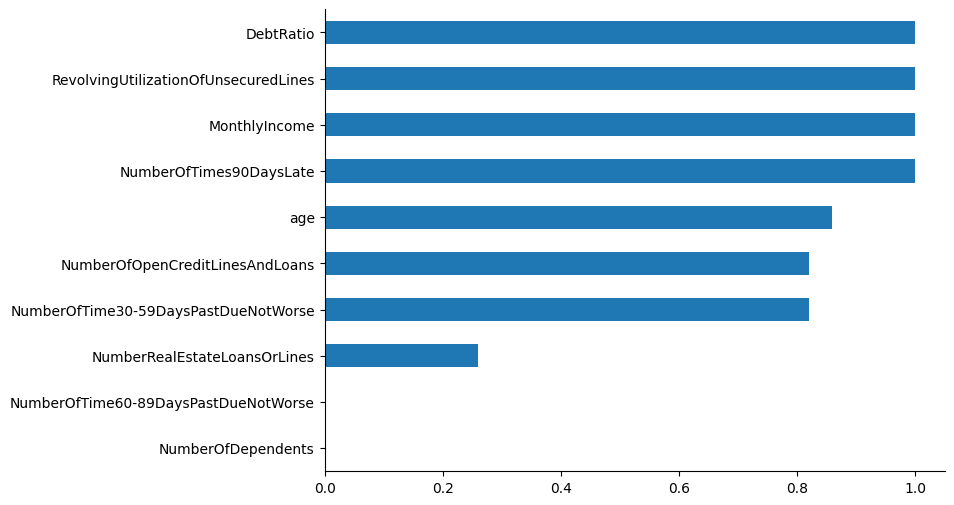

In [ ]:

pd.Series(local_feat_importance.local_importance[0]).sort_values().plot(kind='barh');

In [ ]:
global_feat_importance = dice_exp.global_feature_importance(X_train[y_train==1].iloc[:50])

100%|██████████| 50/50 [00:11<00:00,  4.50it/s]


# 3.Advantages and Disadvantages

##Advantages

Counterfactual explanations provide contrastive and clear interpretations of the local prediction of the model. Since we also use the black box model itself and no surrogate models, we won't worry about differences in prediction capability of the black box model and surrogate model.
Counterfactual technically only needs the prediction function. Although access to the training data enable us to check whether our counterfactual can actually be realized, the fact that we can infer counterfactuals without it is quite powerful specially on scenarios where there is high security and legal requirement regarding model and data disclosure.
Counterfactual explanations can be implemented stratightforwardly. Although performance-wise, using optimizer library may be more efficient in reducing the loss function.


##Disadvantage

The Rashomon effect. As observed you can find several mulple counterfactual explanations for a given instance. Some of which may not make sense. The question also of how many should you report to your stakeholders become apparent.